In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats

from pylab import rcParams

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

In [3]:
# Load Train Dataset

Train=pd.read_csv("Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test=pd.read_csv("Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [4]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


Basic Data Understanding

Train and Test Data Understanding

In [5]:
## Lets check shape of Train and Test Data

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [6]:
## Lets check whether  providers details are unique or not in train data
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Train :',Test.isna().sum().sum())

PRV53423    1
PRV53411    1
Name: Provider, dtype: int64

 Total missing values in Train : 0

 Total missing values in Train : 0


Beneficiary Data Understanding

In [7]:
#Lets Check missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [8]:
# Lets check data types of each column in beneficiary data

Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [10]:
Train_Beneficiarydata.head(5)
Test_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,0,1,1,1,0,0,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,1,45,780,12,12,...,1,0,1,0,0,0,21260,2136,120,100


In [11]:
Train.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV53423,No
freq,1,4904


In [12]:
Train_Beneficiarydata.describe(include='all')

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556,138556,1421,138556.000000,138556.000000,138556,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
unique,138556,900,11,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BENE140057,1939-10-01,2009-12-01,NaN,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,540,182,NaN,NaN,118978,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.570932,1.254511,NaN,25.666734,374.424745,11.907727,11.910145,...,0.355524,0.601858,0.675857,0.274683,0.256820,0.079058,3660.346502,399.847296,1298.219348,377.718258
std,NaN,NaN,NaN,0.494945,0.717007,NaN,15.223443,266.277581,1.032332,0.936893,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,NaN,11.000000,141.000000,12.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,40.000000
50%,NaN,NaN,NaN,2.000000,1.000000,NaN,25.000000,340.000000,12.000000,12.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,570.000000,170.000000
75%,NaN,NaN,NaN,2.000000,1.000000,NaN,39.000000,570.000000,12.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2280.000000,1068.000000,1500.000000,460.000000


In [13]:
Train_Outpatientdata.describe(include='all')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
count,517737,517737,517737,517737,517737,517737.000000,516341,90617,195046,507284,...,14838,1083,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000,105425
unique,133980,517737,385,366,5012,NaN,74109,28532,44388,10354,...,1894,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3715
top,BENE42721,CLM536714,2009-03-03,2009-03-03,PRV51459,NaN,PHY330576,PHY330576,PHY412132,4019,...,4019,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V7612
freq,29,1,1574,1563,8240,NaN,2534,424,1247,13803,...,616,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4074
mean,NaN,NaN,NaN,NaN,NaN,286.334799,NaN,NaN,NaN,NaN,...,NaN,NaN,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233,NaN
std,NaN,NaN,NaN,NaN,NaN,694.034343,NaN,NaN,NaN,NaN,...,NaN,NaN,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000,NaN


In [14]:
Train_Inpatientdata.describe(include='all')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474,40474,40474,40474,40474,40474.000000,40362,23830,4690,40474,...,33216,30532,26977,3927,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
unique,31289,40474,398,365,2092,NaN,11604,8287,2877,398,...,2310,2243,2094,952,NaN,NaN,NaN,NaN,NaN,NaN
top,BENE134170,CLM76574,2009-02-10,2009-02-11,PRV52019,NaN,PHY422134,PHY429430,PHY416093,2009-02-10,...,4019,4019,4019,4019,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,1,145,153,516,NaN,386,225,81,144,...,1402,1200,965,128,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10087.884074,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,NaN,NaN,NaN,NaN,NaN,10303.099402,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,4000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,7000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,12000.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN


In [15]:
## Lets Create Age column to the dataset

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] )
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'])
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [16]:
Train_Beneficiarydata.head(40)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,NaN
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,NaN
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,NaN
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,NaN
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,NaN
5,BENE11006,1976-09-01,NaT,2,1,0,23,810,12,12,...,0,0,0,0,0,0,0,500,0,NaN
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0
7,BENE11008,1934-02-01,NaT,2,1,0,15,140,12,12,...,1,0,0,0,0,0,0,30,0,NaN
8,BENE11009,1929-06-01,NaT,1,1,1,44,230,12,12,...,1,0,0,0,0,0,0,100,0,NaN
9,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,...,1,1,1,0,0,0,0,1170,660,NaN


In [17]:
Test_Beneficiarydata.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,...,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,574.000000
mean,1.574053,1.250219,26.298681,368.597893,11.918850,11.928152,0.367434,0.542553,0.360899,0.137444,...,0.653233,0.717327,0.295945,0.282313,0.090467,4557.559561,497.287769,1664.710324,478.964154,74.459930
std,0.494490,0.710366,14.954124,270.243676,0.967169,0.841754,0.482110,0.498190,0.480265,0.344318,...,0.475945,0.450302,0.456470,0.450128,0.286852,10741.954472,1095.432994,3010.045357,768.234011,11.109213
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000,0.000000,-60.000000,0.000000,37.000000
25%,1.000000,1.000000,12.000000,140.000000,12.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,290.000000,70.000000,68.000000
50%,2.000000,1.000000,26.000000,330.000000,12.000000,12.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,230.000000,75.000000
75%,2.000000,1.000000,39.000000,560.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,5000.000000,1068.000000,1960.000000,590.000000,82.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,155600.000000,38272.000000,97510.000000,13840.000000,100.000000


Add Age of Person based on his/her DOD(Date of death ) and DOB (Date of Birth)

In [18]:
## As we see that last DOD value is 2017-12-01 ,which means Beneficiary Details data is of year 2017.
## so we will calculate age of other benficiaries for year 2017.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2017-12-01' ) - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2017-12-01') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [19]:
Train_Beneficiarydata.head(5)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,75.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,81.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,81.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,95.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,82.0


Add Flag column 'WhetherDead' using DOD values to tell whether beneficiary is dead on not

In [20]:
#Lets create a new variable 'WhetherDead' with flag 1 means Dead and 0 means not Dead

Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Train_Beneficiarydata.loc[:,'WhetherDead'].head(7)


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Test_Beneficiarydata.loc[:,'WhetherDead'].head(7)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: WhetherDead, dtype: float64

In [21]:
Train_Beneficiarydata.loc[:,'DOB']

0        1943-01-01
1        1936-09-01
2        1936-08-01
3        1922-07-01
4        1935-09-01
5        1976-09-01
6        1940-09-01
7        1934-02-01
8        1929-06-01
9        1936-07-01
10       1914-03-01
11       1934-05-01
12       1927-12-01
13       1938-04-01
14       1936-03-01
15       1919-09-01
16       1940-06-01
17       1939-10-01
18       1924-05-01
19       1939-01-01
20       1927-12-01
21       1958-08-01
22       1931-02-01
23       1942-07-01
24       1938-01-01
25       1940-03-01
26       1941-12-01
27       1928-12-01
28       1944-12-01
29       1937-10-01
            ...    
138526   1942-07-01
138527   1947-03-01
138528   1951-03-01
138529   1943-03-01
138530   1925-08-01
138531   1940-08-01
138532   1919-05-01
138533   1953-10-01
138534   1914-04-01
138535   1919-09-01
138536   1922-05-01
138537   1940-06-01
138538   1922-09-01
138539   1937-01-01
138540   1943-11-01
138541   1920-01-01
138542   1940-09-01
138543   1935-06-01
138544   1930-01-01


In [22]:
Train_Beneficiarydata.iloc[:,-1].head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: WhetherDead, dtype: float64

In [23]:
Train_Beneficiarydata.loc[:,'WhetherDead'].head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: WhetherDead, dtype: float64

In [24]:
Train_Beneficiarydata.nunique()

BeneID                             138556
DOB                                   900
DOD                                    11
Gender                                  2
Race                                    4
RenalDiseaseIndicator                   2
State                                  52
County                                314
NoOfMonths_PartACov                    13
NoOfMonths_PartBCov                    13
ChronicCond_Alzheimer                   2
ChronicCond_Heartfailure                2
ChronicCond_KidneyDisease               2
ChronicCond_Cancer                      2
ChronicCond_ObstrPulmonary              2
ChronicCond_Depression                  2
ChronicCond_Diabetes                    2
ChronicCond_IschemicHeart               2
ChronicCond_Osteoporasis                2
ChronicCond_rheumatoidarthritis         2
ChronicCond_stroke                      2
IPAnnualReimbursementAmt             3004
IPAnnualDeductibleAmt                 147
OPAnnualReimbursementAmt          

In [25]:
Train_Beneficiarydata['DOD'].value_counts()

2009-12-01    182
2009-10-01    168
2009-09-01    164
2009-11-01    149
2009-08-01    144
2009-07-01    141
2009-05-01    119
2009-06-01    119
2009-04-01     94
2009-03-01     91
2009-02-01     50
Name: DOD, dtype: int64

In [26]:
#Lets check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [27]:
Train_Inpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

Create new column 'AdmitForDays' indicating number of days patient was admitted in hospital

In [28]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'])
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'])
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days.abs())+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'])
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'])
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days.abs())+1

In [29]:
Train_Inpatientdata.loc[:,['AdmissionDt','DischargeDt','AdmitForDays']]

,AdmissionDt,DischargeDt,AdmitForDays
0,2009-04-12,2009-04-18,7
1,2009-08-31,2009-09-02,3
2,2009-09-17,2009-09-20,4
3,2009-02-14,2009-02-22,9
4,2009-08-13,2009-08-30,18
5,2009-10-06,2009-10-12,7
6,2009-01-02,2009-01-07,6
7,2009-08-03,2009-08-07,5
8,2009-08-06,2009-08-09,4
9,2008-12-29,2009-01-05,8


In [30]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

Outpatient Data understanding

Lets Check null values in each columnn of outpatient data

In [31]:
Train_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [32]:
Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [33]:
## Lets Check Shape of datasets after adding new variables

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


# Data Merging

As we see columns in inpatient and outpatient data are similar, we will merge this data based on these similar keys

In [34]:
Key_Column_To_Merge_Outpatient=Train_Outpatientdata.columns
print(Key_Column_To_Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


In [35]:
train_all=pd.merge(Train_Outpatientdata,Train_Inpatientdata,how='outer')

In [36]:
train_all.shape

(558211, 31)

Merge Inpatient and Outpatinet data and create dataset for all patients.

In [37]:
# Lets make union of Inpatienta and outpatient data .
# We will use all keys in outpatient data as we want to make union and dont want duplicate columns from both tables.

Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')



Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [38]:
print('Train_Allpatientdata',Train_Allpatientdata.shape)
print('Test_Allpatientdata',Test_Allpatientdata.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


Merge Beneficiary details to All Patients data

In [39]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [40]:
## Lets Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetailsdata.shape)


print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


In [41]:
Train_AllPatientDetailsdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,0,0,0,0,0,30,50,81.0,0.0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,1,0,0,0,0,0,90,40,81.0,0.0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,1,0,0,0,0,0,90,40,81.0,0.0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,0,0,0,1810,760,95.0,0.0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,0,0,0,1810,760,95.0,0.0


In [42]:
Test_AllPatientDetailsdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,0,1,1,36000,3204,60,70,75.0,0.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,0,1,1,36000,3204,60,70,75.0,0.0
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,0,1,1,0,0,0,1490,160,69.0,1.0
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,0,1,1,0,0,0,1490,160,69.0,1.0
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,0,1,1,0,0,0,1490,160,69.0,1.0


Merge PotentialFraud details for each provider to create ProviderWithPatientDetails data

In [43]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_ProviderWithPatientDetailsdata=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [44]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head(5)

Shape of Train Provider with Patient Details data :- (558211, 58)


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,1,0,0,0,0,0,300,110,88.0,0.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,...,1,1,0,1,0,0,720,10,75.0,0.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,...,1,0,1,0,0,0,1380,370,84.0,0.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,1,0,0,0,2020,1068,6700,2700,82.0,0.0
4,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,0,0,1,36000,1068,3520,140,77.0,0.0


In [45]:
print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head(5)

Shape of Test Provider with Patient Details data :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,0,0,0,0,0,0,1310,590,83.0,0.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,0,0,0,22000,3204,1020,910,97.0,0.0
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70,PHY352340,NaN,NaN,V4581,...,1,0,0,0,22000,3204,1020,910,97.0,0.0
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100,PHY366184,NaN,NaN,42789,...,1,0,0,0,22000,3204,1020,910,97.0,0.0
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400,PHY401762,NaN,PHY330212,1532,...,1,1,0,1,8000,13136,1520,730,57.0,0.0


In [46]:
### Lets check missing value percentage in full datasets

#print('Percent missing values in Train Provider with patient details data :\n')


Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)

Provider                             0.000000
PotentialFraud                       0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                  90.425843
ClmDiagnosisCode_9                  92.509105
ClmDiagnosisCode_10                 99.102490
ClmProcedureCode_1                  95.824160
ClmProcedureCode_2                


## Another Way to Merge

In [47]:
patient_merge_id = [i for i in Train_Outpatientdata.columns if i in Train_Inpatientdata.columns]

# Merge Inpatient, Outpatient and beneficiary dataframe into a single patient dataset
Train_Patient_data = pd.merge(Train_Inpatientdata, Train_Outpatientdata,
                    left_on = patient_merge_id,
                    right_on = patient_merge_id,
                    how = 'outer').\
          merge(Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [48]:
[i for i in Train_Outpatientdata.columns if i in Train_Inpatientdata.columns]

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [49]:
Train_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [50]:
Train_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays'],
      dtype='object')

In [51]:
Train_Patient_data.shape

(558211, 57)

In [52]:
patient_merge_id = [i for i in Test_Outpatientdata.columns if i in Test_Inpatientdata.columns]


Test_Patient_data = pd.merge(Test_Inpatientdata, Test_Outpatientdata,
                    left_on = patient_merge_id,
                    right_on = patient_merge_id,
                    how = 'outer').\
          merge(Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [53]:
Test_Patient_data.shape

(135392, 57)

In [54]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 57 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 556703 non-null object
OperatingPhysician                 114447 non-null object
OtherPhysician                     199736 non-null object
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  557312 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 547758 non-null object
ClmDia

In [55]:
Train_Patient_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

## EDA

In [56]:
Train_Patient_data.describe(include='all')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
count,558211,558211,558211,558211,558211,558211.000000,556703,114447,199736,40474,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
unique,138556,558211,398,366,5410,NaN,82063,35315,46457,398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BENE59303,CLM536714,2009-01-31,2009-03-03,PRV51459,NaN,PHY330576,PHY330576,PHY412132,2009-02-10 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,29,1,1709,1707,8240,NaN,2534,424,1247,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-27 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-12-31 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,997.012133,NaN,NaN,NaN,NaN,...,0.759265,0.317647,0.311171,0.101720,5227.971466,568.756807,2278.225348,649.698745,81.710566,0.007400
std,NaN,NaN,NaN,NaN,NaN,3821.534891,NaN,NaN,NaN,NaN,...,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,13.036277,0.085707
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000,34.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,460.000000,120.000000,76.000000,0.000000


In [57]:
Train_Patient_data[['AttendingPhysician','OperatingPhysician', 'OtherPhysician']].describe()

,AttendingPhysician,OperatingPhysician,OtherPhysician
count,556703,114447,199736
unique,82063,35315,46457
top,PHY330576,PHY330576,PHY412132
freq,2534,424,1247


In [58]:
Train_Patient_data['AttendingPhysician'].value_counts()

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
PHY327046    1181
PHY338032    1158
PHY337425    1156
PHY357120    1156
PHY341578    1133
PHY432650    1093
PHY347064    1076
PHY351121    1053
PHY383481    1005
PHY415321    1002
PHY344389    1000
PHY433436     924
PHY375943     912
PHY375453     880
PHY387126     762
PHY357307     737
PHY432614     716
PHY318667     711
PHY424712     693
PHY326984     686
PHY347780     678
PHY362889     674
PHY313278     674
PHY389456     673
PHY323447     664
             ... 
PHY376406       1
PHY424557       1
PHY348987       1
PHY381321       1
PHY385975       1
PHY431352       1
PHY426792       1
PHY377408       1
PHY360616       1
PHY338293       1
PHY411757       1
PHY375985       1
PHY420791       1
PHY311283       1
PHY391273       1
PHY416975       1
PHY368138       1
PHY432686       1
PHY426368       1
PHY351357       1
PHY432033       1
PHY409448       1
PHY424901       1
PHY404250       1
PHY412398 

In [59]:
Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PHY390922,NaN,NaN
1,PHY318495,PHY318495,NaN
2,PHY372395,NaN,PHY324689
3,PHY369659,PHY392961,PHY349768
4,PHY379398,NaN,NaN
5,PHY429635,NaN,PHY322331
6,PHY345842,NaN,NaN
7,PHY379376,PHY398258,NaN
8,PHY373512,NaN,PHY373512
9,PHY402711,PHY402711,PHY402711


In [60]:
Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isnull(), 0, 1)

In [61]:
Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,1,0,0
1,1,1,0
2,1,0,1
3,1,1,1
4,1,0,0
5,1,0,1
6,1,0,0
7,1,1,0
8,1,0,1
9,1,1,1


In [62]:
Train_Patient_data['N_Types_Physicians'] = Train_Patient_data['AttendingPhysician'] +  Train_Patient_data['OperatingPhysician'] + Train_Patient_data['OtherPhysician']

In [63]:
Train_Patient_data['N_Types_Physicians']

0         1
1         2
2         2
3         3
4         1
5         2
6         1
7         2
8         2
9         3
10        1
11        2
12        2
13        2
14        2
15        1
16        2
17        2
18        2
19        1
20        2
21        2
22        1
23        2
24        2
25        2
26        1
27        1
28        1
29        1
         ..
558181    2
558182    1
558183    1
558184    2
558185    3
558186    1
558187    2
558188    2
558189    1
558190    1
558191    2
558192    2
558193    2
558194    3
558195    2
558196    1
558197    1
558198    2
558199    2
558200    1
558201    3
558202    1
558203    1
558204    1
558205    2
558206    3
558207    2
558208    1
558209    2
558210    2
Name: N_Types_Physicians, Length: 558211, dtype: int64

In [64]:
Train_Patient_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                          0
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [65]:
Train_Patient_data['DiagnosisGroupCode'].describe()

count     40474
unique      736
top         882
freq        179
Name: DiagnosisGroupCode, dtype: object

In [66]:
Count_DiagnosisGroupCode=Train_Patient_data['DiagnosisGroupCode'].value_counts()
Count_DiagnosisGroupCode=Count_DiagnosisGroupCode[:20]
Count_DiagnosisGroupCode

882    179
884    174
166    168
183    165
939    163
883    160
168    160
887    159
204    158
876    156
945    156
949    154
208    153
202    153
167    153
198    152
188    151
192    150
196    150
177    150
Name: DiagnosisGroupCode, dtype: int64

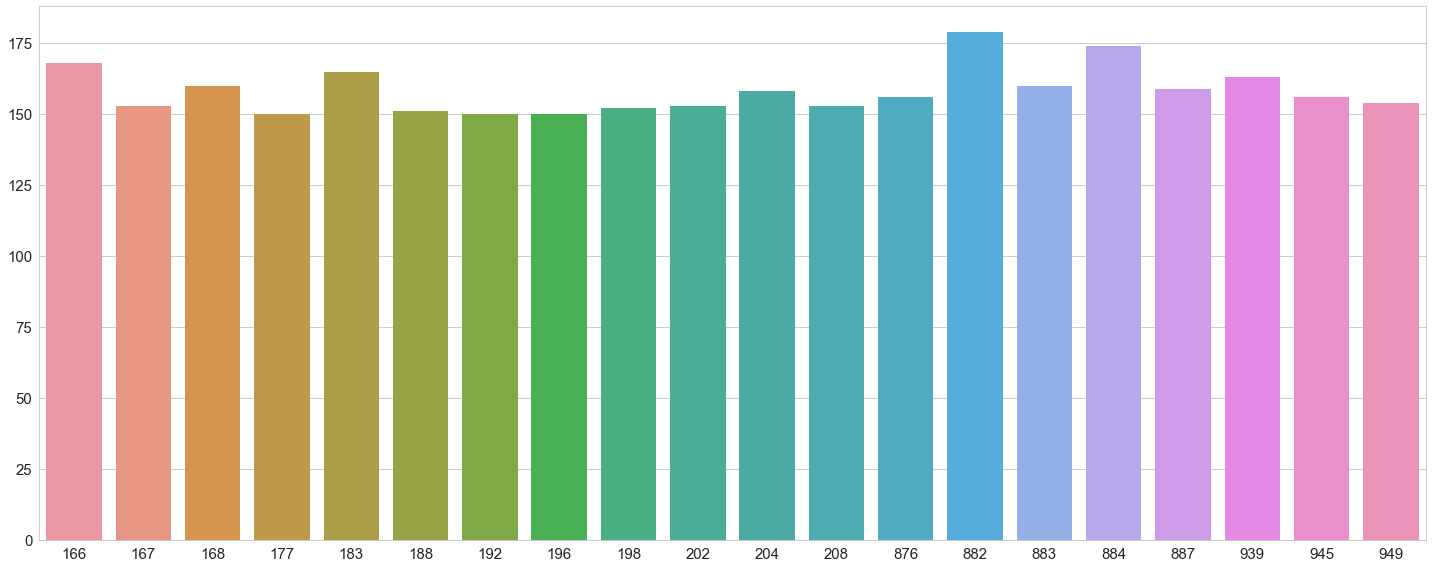

In [67]:
fig=plt.figure(figsize=(20,8))
sns.barplot(Count_DiagnosisGroupCode.index,Count_DiagnosisGroupCode.values)
fig.tight_layout()

In [68]:
Train_Patient_data['IsDiagnosisCode'] = np.where(Train_Patient_data.DiagnosisGroupCode.notnull(), 1, 0)
Train_Patient_data = Train_Patient_data.drop(['DiagnosisGroupCode'], axis = 1)

In [69]:
Train_Patient_data['IsDiagnosisCode']

0         1
1         1
2         1
3         1
4         0
5         0
6         0
7         1
8         0
9         1
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        1
19        0
20        0
21        1
22        1
23        0
24        1
25        1
26        0
27        0
28        0
29        0
         ..
558181    0
558182    0
558183    0
558184    0
558185    0
558186    0
558187    0
558188    0
558189    0
558190    0
558191    0
558192    0
558193    0
558194    0
558195    0
558196    0
558197    0
558198    0
558199    0
558200    0
558201    0
558202    0
558203    0
558204    0
558205    0
558206    0
558207    0
558208    0
558209    0
558210    0
Name: IsDiagnosisCode, Length: 558211, dtype: int32

In [70]:
Train_Patient_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                          0
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                

In [71]:
Train_Patient_data['DeductibleAmtPaid'].describe()

count    557312.000000
mean         78.421085
std         274.016812
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1068.000000
Name: DeductibleAmtPaid, dtype: float64

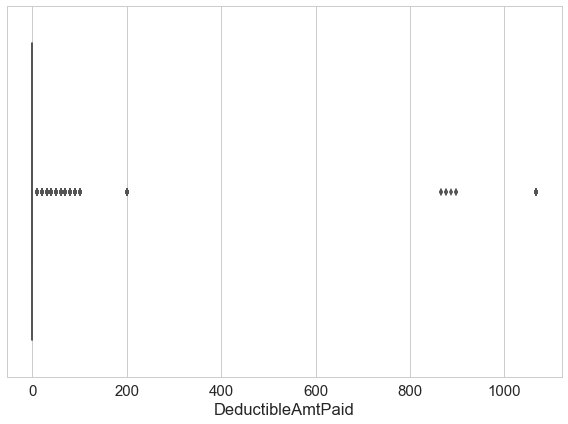

In [72]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['DeductibleAmtPaid'])
fig.tight_layout()

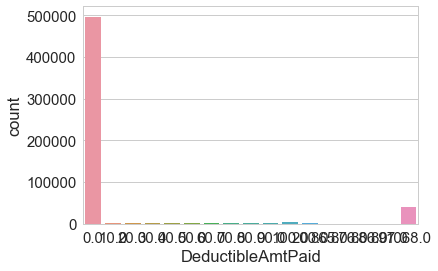

In [73]:
sns.countplot(Train_Patient_data['DeductibleAmtPaid'])

In [74]:
Train_Patient_data['DeductibleAmtPaid'].value_counts()

0.0       496701
1068.0     39575
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
200.0        734
876.0          2
865.0          2
897.0          2
886.0          1
Name: DeductibleAmtPaid, dtype: int64

In [75]:
Train_Patient_data['DeductibleAmtPaid'].isnull().sum()

899

In [76]:

import scipy as sc
sc.stats.describe(Train_Patient_data['DeductibleAmtPaid'],nan_policy='omit')

DescribeResult(nobs=557312, minmax=(masked_array(data=0.,
             mask=False,
       fill_value=1e+20), masked_array(data=1068.,
             mask=False,
       fill_value=1e+20)), mean=78.42108549609554, variance=75085.21352232435, skewness=masked_array(data=3.32405005,
             mask=False,
       fill_value=1e+20), kurtosis=9.085581103391615)

In [77]:
Train_Patient_data['DeductibleAmtPaid'].median()

0.0

In [78]:
Train_Patient_data['DeductibleAmtPaid'].fillna(0,inplace=True)

In [79]:
Train_Patient_data['IsDeductibleAmtPaid']=np.where(Train_Patient_data['DeductibleAmtPaid']==0,0,1) 

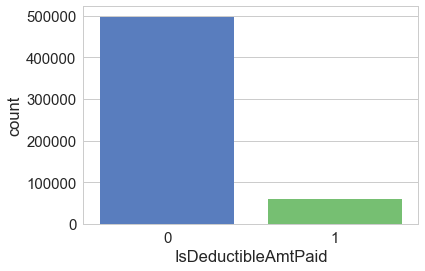

In [80]:
sns.countplot(Train_Patient_data['IsDeductibleAmtPaid'])

In [81]:
Train_Patient_data['IsDeductibleAmtPaid'].value_counts()

0    497600
1     60611
Name: IsDeductibleAmtPaid, dtype: int64

In [82]:
Train_Patient_data['DeductibleAmtPaid'].isnull().sum()

0

In [83]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 59 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 558211 non-null int64
OperatingPhysician                 558211 non-null int64
OtherPhysician                     558211 non-null int64
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  558211 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
ClmDiagnosisCode_1                 547758 non-null object
ClmDiagnosisCode_2                 362605 non-null object
ClmDiagn

In [84]:
Train_Patient_data['AdmitForDays'].isnull().sum()

517737

In [85]:
Train_Patient_data['AdmitForDays'].fillna(0,inplace=True)

In [86]:
Train_Patient_data['AdmitForDays'].isnull().sum()

0

In [87]:
Train_Patient_data.Gender.describe()

count    558211.000000
mean          1.578838
std           0.493746
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: Gender, dtype: float64

In [88]:
Train_Patient_data.Gender.value_counts()

2    323114
1    235097
Name: Gender, dtype: int64

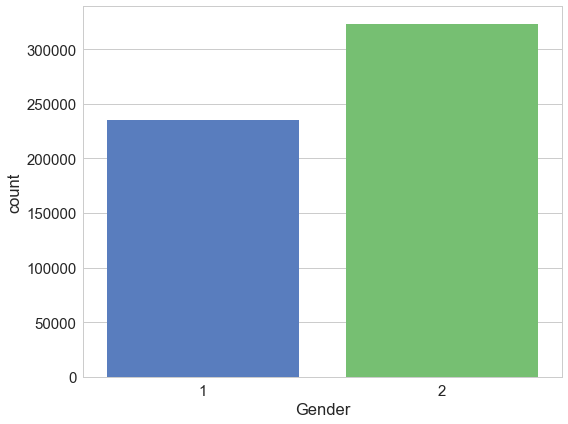

In [89]:
fig=plt.figure(figsize=(8,6))
sns.countplot(Train_Patient_data['Gender'])
fig.tight_layout()

In [90]:
Train_Patient_data['Gender']=Train_Patient_data['Gender'].replace(2,0)

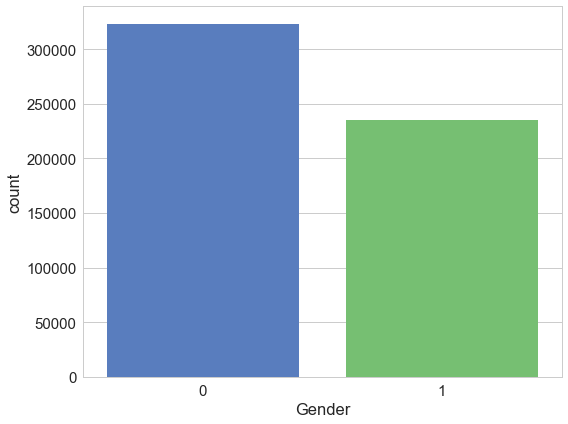

In [91]:
fig=plt.figure(figsize=(8,6))
sns.countplot(Train_Patient_data['Gender'])
fig.tight_layout()

In [92]:
Train_Patient_data['Race'].describe()

count    558211.000000
mean          1.255011
std           0.717437
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: Race, dtype: float64

In [93]:
Train_Patient_data['Race']

0         1
1         1
2         1
3         2
4         2
5         2
6         2
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        2
19        2
20        2
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
558181    1
558182    1
558183    1
558184    1
558185    1
558186    1
558187    1
558188    1
558189    1
558190    1
558191    1
558192    1
558193    1
558194    1
558195    1
558196    1
558197    1
558198    1
558199    1
558200    1
558201    1
558202    1
558203    1
558204    1
558205    1
558206    1
558207    1
558208    1
558209    1
558210    1
Name: Race, Length: 558211, dtype: int64

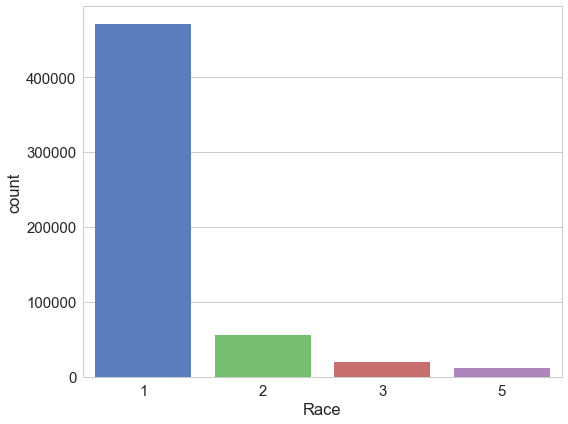

In [94]:
fig=plt.figure(figsize=(8,6))
sns.countplot(Train_Patient_data['Race'])
fig.tight_layout()

In [95]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(Train_Patient_data.Race.values.reshape(-1, 1)).toarray()

In [96]:
x

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [97]:
df_OneHot = pd.DataFrame(x, columns = ["Race_"+str(int(i)) for i in range(1,5)]) 
df_OneHot

,Race_1,Race_2,Race_3,Race_4
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [98]:
df_OneHot.drop('Race_1',axis=1,inplace=True)

In [99]:
df_OneHot

,Race_2,Race_3,Race_4
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [100]:
Train_Patient_data = pd.concat([Train_Patient_data, df_OneHot], axis=1)
#droping the country column 


In [101]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 62 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 558211 non-null int64
OperatingPhysician                 558211 non-null int64
OtherPhysician                     558211 non-null int64
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  558211 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
ClmDiagnosisCode_1                 547758 non-null object
ClmDiagnosisCode_2                 362605 non-null object
ClmDiagn

In [102]:
Train_Patient_data.drop(['Race'], axis=1,inplace=True) 

In [103]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 558211 non-null int64
OperatingPhysician                 558211 non-null int64
OtherPhysician                     558211 non-null int64
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  558211 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
ClmDiagnosisCode_1                 547758 non-null object
ClmDiagnosisCode_2                 362605 non-null object
ClmDiagn

In [104]:
Train_Patient_data['RenalDiseaseIndicator'].describe()

count     558211
unique         2
top            0
freq      448363
Name: RenalDiseaseIndicator, dtype: object

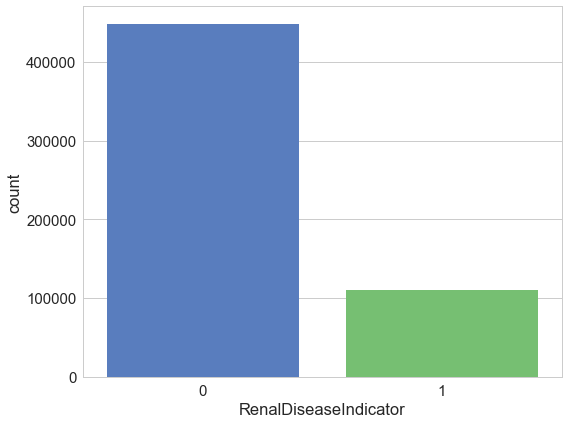

In [105]:
fig=plt.figure(figsize=(8,6))
sns.countplot(Train_Patient_data['RenalDiseaseIndicator'])
fig.tight_layout()

In [106]:
Train_Patient_data['RenalDiseaseIndicator']=Train_Patient_data.RenalDiseaseIndicator.astype(int)

In [107]:
Train_Patient_data['RenalDiseaseIndicator'].describe()

count    558211.000000
mean          0.196786
std           0.397569
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RenalDiseaseIndicator, dtype: float64

In [108]:
Train_Patient_data[['State','County']].describe()

,State,County
count,558211.000000,558211.000000
mean,25.446969,378.588195
std,15.192784,265.215531
min,1.000000,0.000000
25%,11.000000,150.000000
50%,24.000000,350.000000
75%,38.000000,570.000000
max,54.000000,999.000000


In [109]:
state_count=Train_Patient_data['State'].value_counts()
state_count=state_count[:20]
state_count

5     51350
10    39073
33    35024
45    34022
14    24417
39    24251
23    21343
36    21291
34    18905
11    17003
31    15940
49    14997
44    14418
15    14213
22    13624
26    12911
50    11740
21    11261
42    10491
18    10322
Name: State, dtype: int64

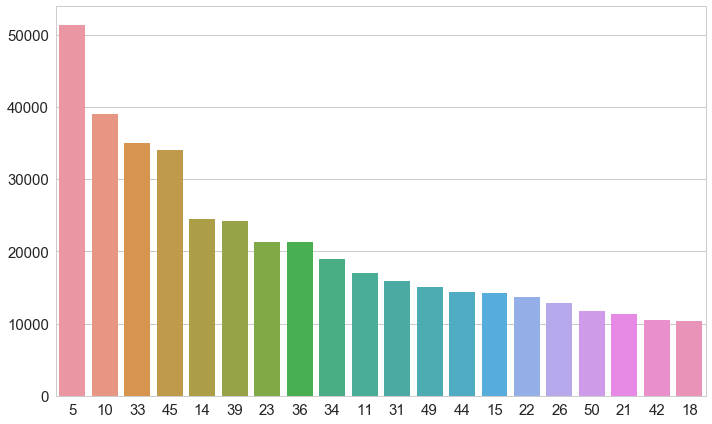

In [110]:
fig=plt.figure(figsize=(10,6))
sns.barplot(state_count.index,state_count.values,order=state_count.index)
fig.tight_layout()

In [111]:
county_count=Train_Patient_data['County'].value_counts()
county_count=county_count[:20]
county_count

200    15957
10     13982
20     12632
470    12278
60     11995
400    11697
0      11481
90     11086
160    10533
150     9687
490     9487
590     9227
310     9027
141     8995
250     8384
130     8283
620     8170
290     8142
170     8017
50      7934
Name: County, dtype: int64

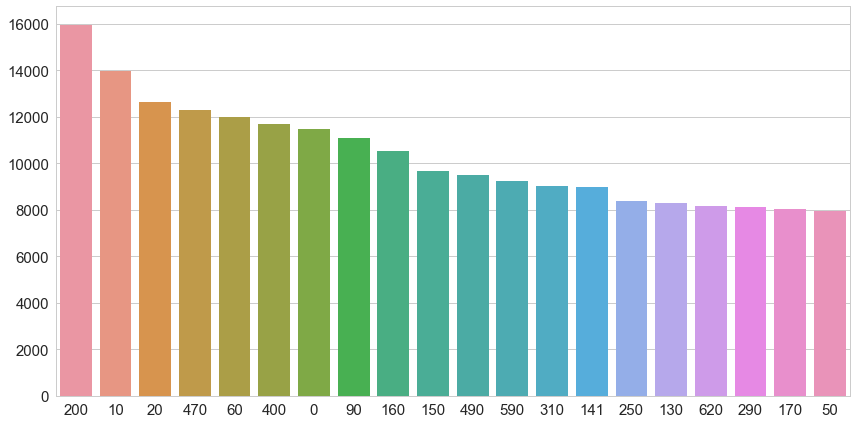

In [112]:
fig=plt.figure(figsize=(12,6))
sns.barplot(county_count.index,county_count.values,order=county_count.index)
fig.tight_layout()

In [113]:
Train_Patient_data['NoOfMonths_PartACov']

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
          ..
558181    12
558182    12
558183    12
558184    12
558185    12
558186    12
558187    12
558188    12
558189    12
558190    12
558191    12
558192    12
558193    12
558194    12
558195    12
558196    12
558197    12
558198    12
558199    12
558200    12
558201    12
558202    12
558203    12
558204    12
558205    12
558206    12
558207    12
558208    12
558209    12
558210    12
Name: NoOfMonths_PartACov, Length: 558211, dtype: int64

In [114]:
Train_Patient_data['NoOfMonths_PartACov'].describe()

count    558211.000000
mean         11.931472
std           0.889712
min           0.000000
25%          12.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: NoOfMonths_PartACov, dtype: float64

In [115]:
Train_Patient_data['NoOfMonths_PartACov'].value_counts()

12    554722
0       2971
6        116
8        100
11        81
4         55
7         44
10        34
5         30
3         16
2         16
9         13
1         13
Name: NoOfMonths_PartACov, dtype: int64

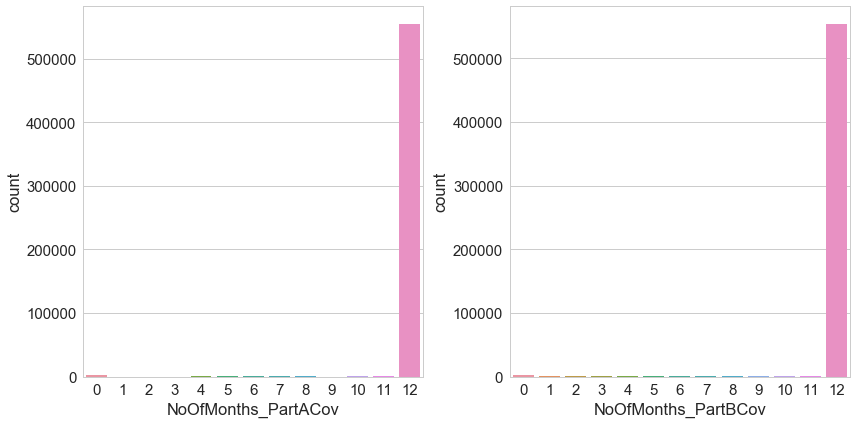

In [116]:
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(Train_Patient_data['NoOfMonths_PartACov'])
plt.subplot(1,2,2)
sns.countplot(Train_Patient_data['NoOfMonths_PartBCov'])
fig.tight_layout()

In [117]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 558211 non-null int64
OperatingPhysician                 558211 non-null int64
OtherPhysician                     558211 non-null int64
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  558211 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
ClmDiagnosisCode_1                 547758 non-null object
ClmDiagnosisCode_2                 362605 non-null object
ClmDiagn

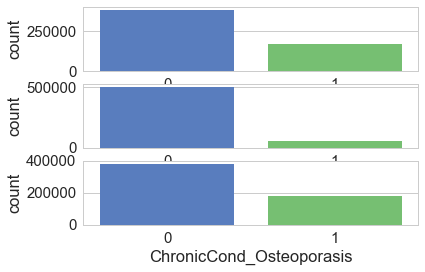

In [118]:
plt.subplot(3,1,1)
sns.countplot(Train_Patient_data.iloc[:,47])
plt.subplot(3,1,2)
sns.countplot(Train_Patient_data.iloc[:,48])
plt.subplot(3,1,3)
sns.countplot(Train_Patient_data.iloc[:,46])

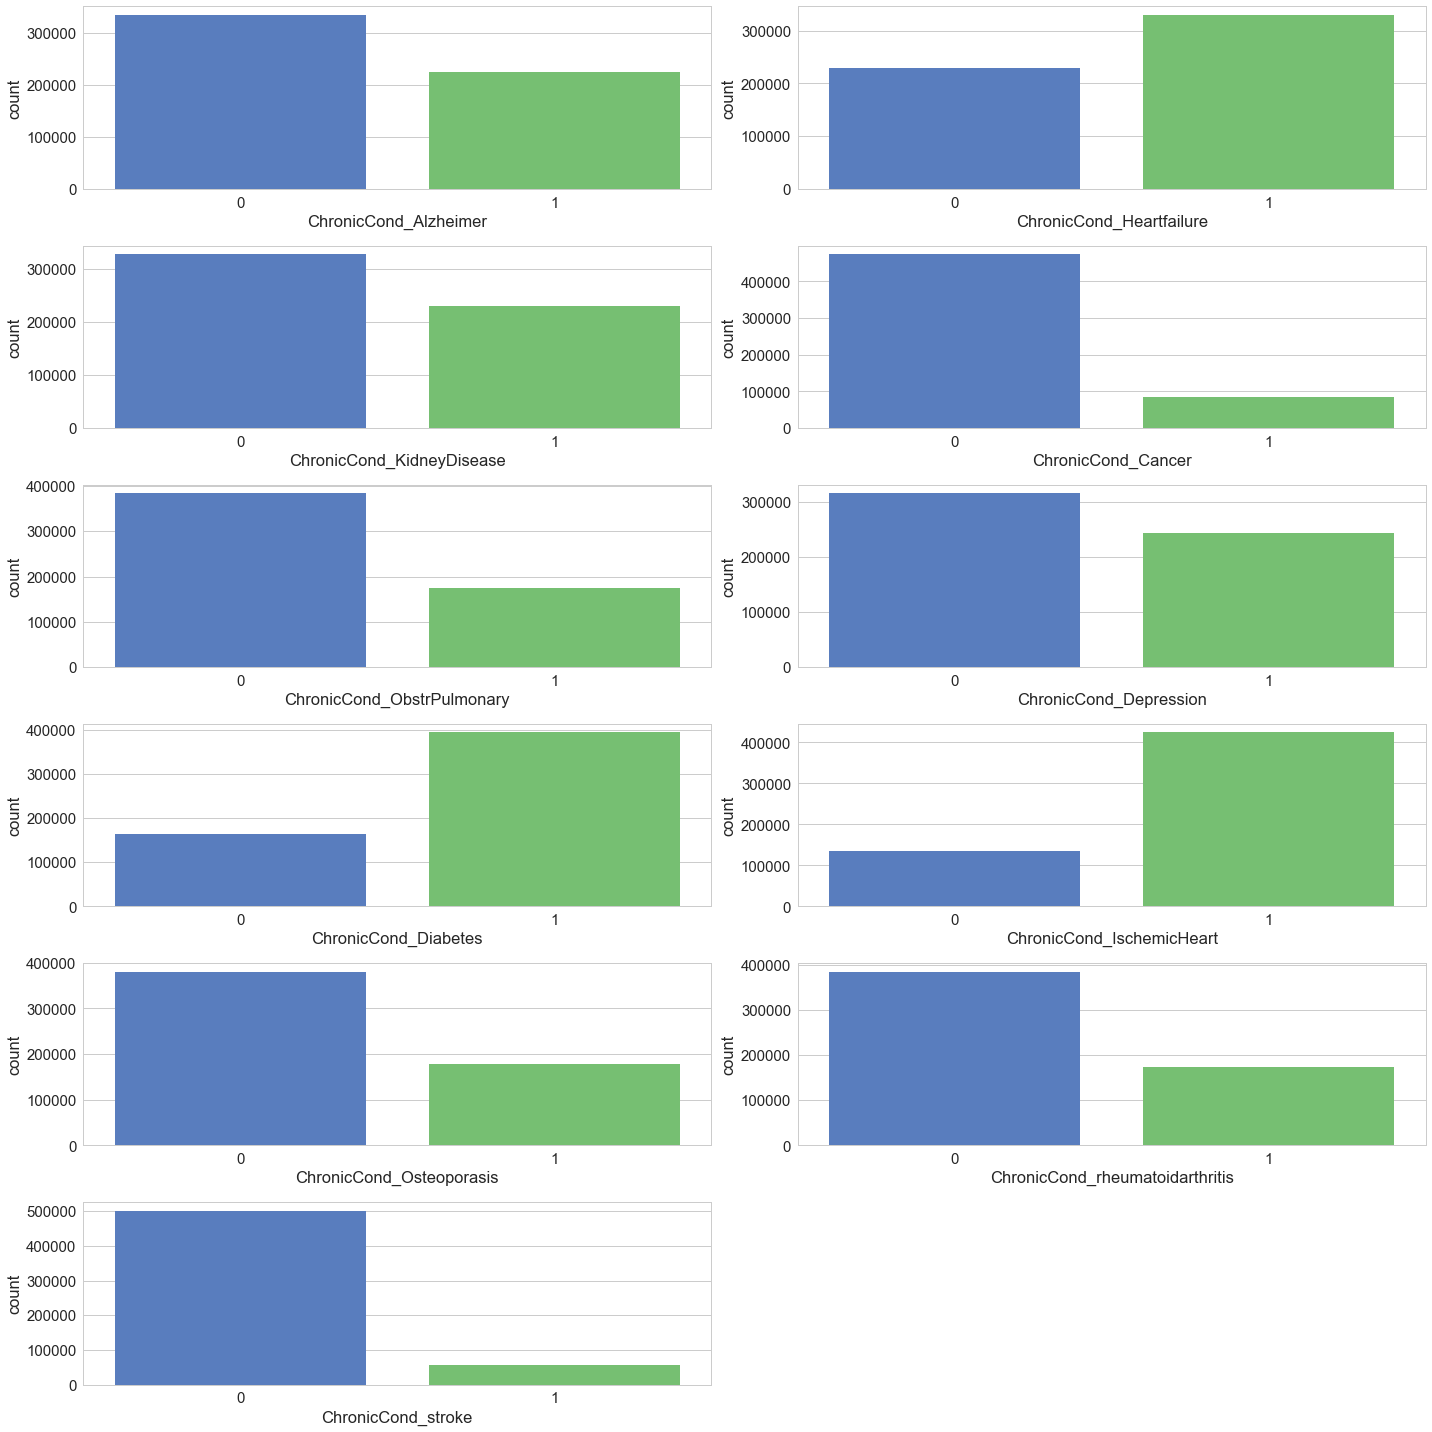

In [119]:
fig=plt.figure(figsize=(20,20))

for col in range(1,12):
    plt.subplot(6,2,col)
    sns.countplot(Train_Patient_data.iloc[:,37+col])
    
fig.tight_layout()

In [120]:
Train_Patient_data['IPAnnualReimbursementAmt'].describe()

count    558211.000000
mean       5227.971466
std       11786.274732
min       -8000.000000
25%           0.000000
50%           0.000000
75%        6000.000000
max      161470.000000
Name: IPAnnualReimbursementAmt, dtype: float64

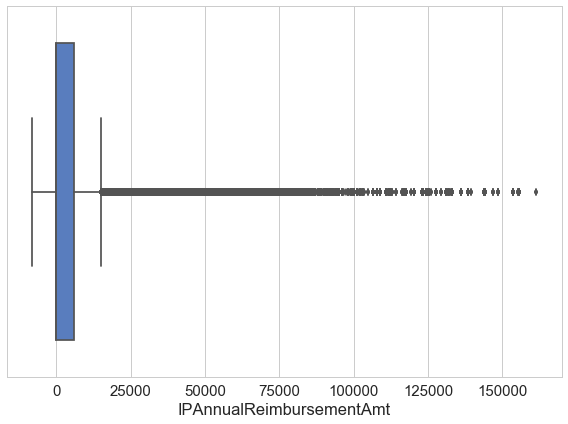

In [121]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['IPAnnualReimbursementAmt'])
fig.tight_layout()

In [122]:
Train_Patient_data['IPAnnualDeductibleAmt'].describe()

count    558211.000000
mean        568.756807
std        1179.172616
min           0.000000
25%           0.000000
50%           0.000000
75%        1068.000000
max       38272.000000
Name: IPAnnualDeductibleAmt, dtype: float64

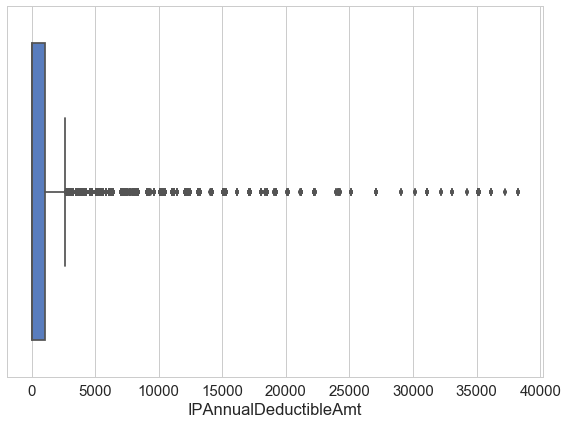

In [123]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['IPAnnualDeductibleAmt'])
fig.tight_layout()

In [124]:
Train_Patient_data['OPAnnualReimbursementAmt'].describe()

count    558211.000000
mean       2278.225348
std        3881.846386
min         -70.000000
25%         460.000000
50%        1170.000000
75%        2590.000000
max      102960.000000
Name: OPAnnualReimbursementAmt, dtype: float64

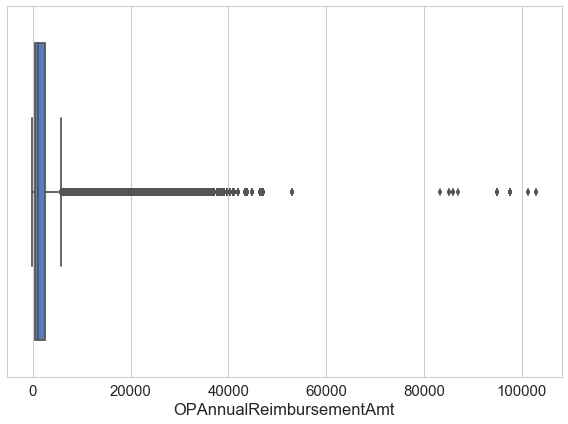

In [125]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['OPAnnualReimbursementAmt'])
fig.tight_layout()

In [126]:
Train_Patient_data['OPAnnualDeductibleAmt'].describe()

count    558211.000000
mean        649.698745
std        1002.020811
min           0.000000
25%         120.000000
50%         340.000000
75%         790.000000
max       13840.000000
Name: OPAnnualDeductibleAmt, dtype: float64

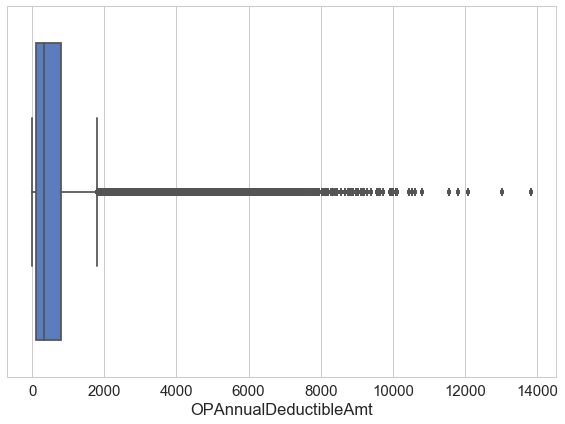

In [127]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['OPAnnualDeductibleAmt'])
fig.tight_layout()

In [128]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 558211 non-null int64
OperatingPhysician                 558211 non-null int64
OtherPhysician                     558211 non-null int64
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  558211 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
ClmDiagnosisCode_1                 547758 non-null object
ClmDiagnosisCode_2                 362605 non-null object
ClmDiagn

In [129]:
ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]

In [130]:
ClmProcedure_vars

['ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [131]:
Train_Patient_data[['AttendingPhysician','OtherPhysician']].describe()

,AttendingPhysician,OtherPhysician
count,558211.000000,558211.000000
mean,0.997299,0.357815
std,0.051906,0.479358
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [132]:
Train_Patient_data[ClmProcedure_vars].describe()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0
mean,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN
std,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN
min,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN
50%,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [133]:
Train_Patient_data[ClmProcedure_vars]

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,7092.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,331.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,3893.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,863.0,NaN,NaN,NaN,NaN,NaN


In [134]:
Train_Patient_data[ClmProcedure_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 6 columns):
ClmProcedureCode_1    23310 non-null float64
ClmProcedureCode_2    5490 non-null float64
ClmProcedureCode_3    969 non-null float64
ClmProcedureCode_4    118 non-null float64
ClmProcedureCode_5    9 non-null float64
ClmProcedureCode_6    0 non-null float64
dtypes: float64(6)
memory usage: 49.8 MB


In [135]:
# This function helps us find the length of unique values in a row
def N_unique_values(df):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

In [136]:
df=pd.DataFrame({"asd":[3,4,4],"asad":[31,np.NaN,4]})
df

,asd,asad
0,3,31.0
1,4,NaN
2,4,4.0


In [137]:
N_unique_values(df)

array([2, 1, 1])

In [138]:
# We count the number of procedures for each claim
Train_Patient_data['N_Procedure'] = N_unique_values(Train_Patient_data[ClmProcedure_vars])



In [139]:
Train_Patient_data['N_Procedure'].head(50)

0     0
1     1
2     0
3     1
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    2
25    1
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    2
35    0
36    0
37    0
38    0
39    2
40    0
41    0
42    0
43    0
44    0
45    1
46    0
47    0
48    0
49    0
Name: N_Procedure, dtype: int32

In [140]:
Train_Patient_data['N_Procedure'].value_counts()

0    534901
1     17820
2      4521
3       851
4       109
5         9
Name: N_Procedure, dtype: int64

In [141]:
Train_Patient_data['N_Procedure'].isnull().sum()

0

In [142]:
# We count the number of claims
ClmDiagnosisCode_vars =['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]

Train_Patient_data['N_Unique_Claims'] = N_unique_values(Train_Patient_data[ClmDiagnosisCode_vars])




In [143]:
Train_Patient_data['N_Unique_Claims']

0         10
1          3
2          7
3         10
4          6
5          2
6          4
7         10
8          1
9         10
10         1
11         5
12         1
13         1
14         4
15         3
16         4
17         1
18        10
19         4
20         1
21        10
22         7
23         5
24        10
25        10
26         2
27         3
28         2
29         1
          ..
558181     5
558182     4
558183     1
558184     2
558185     5
558186     2
558187     3
558188     1
558189     2
558190     2
558191     1
558192     4
558193     1
558194     7
558195     5
558196     2
558197     0
558198     2
558199     1
558200     1
558201     1
558202     5
558203     3
558204     2
558205     1
558206     3
558207     3
558208     2
558209     0
558210     8
Name: N_Unique_Claims, Length: 558211, dtype: int32

In [144]:
Train_Patient_data['N_Unique_Claims'].value_counts()

1     152275
2     132264
3      86573
4      57288
5      30338
10     22219
9      20821
6      19652
7      13770
8      11576
0       8319
11      3116
Name: N_Unique_Claims, dtype: int64

In [145]:
Train_Patient_data.to_csv("C:/Users/hp/Healthcare fraud detetction/train_merge.csv")

In [146]:
Train_Patient_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 63 columns):
BeneID                             558211 non-null object
ClaimID                            558211 non-null object
ClaimStartDt                       558211 non-null object
ClaimEndDt                         558211 non-null object
Provider                           558211 non-null object
InscClaimAmtReimbursed             558211 non-null int64
AttendingPhysician                 558211 non-null int64
OperatingPhysician                 558211 non-null int64
OtherPhysician                     558211 non-null int64
AdmissionDt                        40474 non-null datetime64[ns]
ClmAdmitDiagnosisCode              145899 non-null object
DeductibleAmtPaid                  558211 non-null float64
DischargeDt                        40474 non-null datetime64[ns]
ClmDiagnosisCode_1                 547758 non-null object
ClmDiagnosisCode_2                 362605 non-null object
ClmDiagn

## Final Dataframe

In [147]:
### Count number of records
Train_Count = Train_Patient_data[['BeneID', 'ClaimID']].groupby(Train_Patient_data['Provider']).nunique().reset_index()
Train_Count.rename(columns={'BeneID':'BeneID_count','ClaimID':'ClaimID_count'},inplace=True)

In [148]:
Train_Count

,Provider,BeneID_count,ClaimID_count
0,PRV51001,24,25
1,PRV51003,117,132
2,PRV51004,138,149
3,PRV51005,495,1165
4,PRV51007,58,72
5,PRV51008,36,43
6,PRV51011,53,58
7,PRV51012,31,48
8,PRV51013,44,46
9,PRV51014,25,30


In [149]:
Train_Data_Sum = Train_Patient_data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                     'AttendingPhysician','OperatingPhysician','OtherPhysician','AdmitForDays',
                                                    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer', 
                                                    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
                                                   'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',   
                                                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                    'ChronicCond_stroke', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'WhetherDead',
                                                    'N_Types_Physicians','IsDiagnosisCode', 'N_Procedure', 'N_Unique_Claims']].sum()

In [150]:
Train_Data_Sum

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,IsDiagnosisCode,N_Procedure,N_Unique_Claims
0,PRV51001,104640,5340.0,8,25,5,10,30.0,15,19,...,6,440150,22428,65380,11598,0.0,40,5,3,91
1,PRV51003,605670,66286.0,29,132,45,25,382.0,56,80,...,12,999000,122948,353520,97300,1.0,202,62,48,761
2,PRV51004,52170,310.0,23,149,27,63,0.0,64,88,...,17,648430,64808,327040,92790,1.0,239,0,0,410
3,PRV51005,280910,3700.0,259,1163,222,478,0.0,426,680,...,124,4221950,441724,2457840,741323,4.0,1863,0,0,3246
4,PRV51007,33710,3264.0,11,72,12,26,19.0,26,40,...,12,219600,32040,124540,33820,1.0,110,3,1,231
5,PRV51008,35630,2316.0,10,43,6,17,10.0,17,25,...,2,283460,26700,110530,26490,0.0,66,2,2,143
6,PRV51011,16630,1368.0,12,58,12,21,6.0,25,37,...,2,256060,39108,81160,21270,1.0,91,1,0,158
7,PRV51012,16890,100.0,7,47,8,16,0.0,18,26,...,3,332900,40316,182110,35290,0.0,71,0,0,139
8,PRV51013,14880,230.0,11,46,11,15,0.0,17,26,...,2,167240,27292,148420,42080,0.0,72,0,0,128
9,PRV51014,10480,120.0,8,29,10,20,0.0,16,17,...,3,83590,12816,52270,19480,1.0,59,0,0,115


In [151]:
Train_Data_Mean=round(Train_Patient_data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                                            'Age']].mean())

In [152]:
Train_Data_Mean

,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age
0,PRV51001,12.0,12.0,87.0
1,PRV51003,12.0,12.0,78.0
2,PRV51004,12.0,12.0,80.0
3,PRV51005,12.0,12.0,78.0
4,PRV51007,12.0,12.0,77.0
5,PRV51008,12.0,12.0,84.0
6,PRV51011,12.0,12.0,82.0
7,PRV51012,12.0,12.0,82.0
8,PRV51013,12.0,12.0,82.0
9,PRV51014,12.0,12.0,79.0


In [153]:
Train_df=pd.merge(Train_Count,Train_Data_Sum,on='Provider',how='left').\
                merge(Train_Data_Mean,on='Provider',how='left').\
                merge(Train,on='Provider',how='left')

In [154]:
Train_df

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,...,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,IsDiagnosisCode,N_Procedure,N_Unique_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340.0,8,25,5,10,30.0,...,11598,0.0,40,5,3,91,12.0,12.0,87.0,No
1,PRV51003,117,132,605670,66286.0,29,132,45,25,382.0,...,97300,1.0,202,62,48,761,12.0,12.0,78.0,Yes
2,PRV51004,138,149,52170,310.0,23,149,27,63,0.0,...,92790,1.0,239,0,0,410,12.0,12.0,80.0,No
3,PRV51005,495,1165,280910,3700.0,259,1163,222,478,0.0,...,741323,4.0,1863,0,0,3246,12.0,12.0,78.0,Yes
4,PRV51007,58,72,33710,3264.0,11,72,12,26,19.0,...,33820,1.0,110,3,1,231,12.0,12.0,77.0,No
5,PRV51008,36,43,35630,2316.0,10,43,6,17,10.0,...,26490,0.0,66,2,2,143,12.0,12.0,84.0,No
6,PRV51011,53,58,16630,1368.0,12,58,12,21,6.0,...,21270,1.0,91,1,0,158,12.0,12.0,82.0,No
7,PRV51012,31,48,16890,100.0,7,47,8,16,0.0,...,35290,0.0,71,0,0,139,12.0,12.0,82.0,No
8,PRV51013,44,46,14880,230.0,11,46,11,15,0.0,...,42080,0.0,72,0,0,128,12.0,12.0,82.0,No
9,PRV51014,25,30,10480,120.0,8,29,10,20,0.0,...,19480,1.0,59,0,0,115,12.0,12.0,79.0,No


In [155]:
Train_df.describe()

,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,ChronicCond_Alzheimer,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,IsDiagnosisCode,N_Procedure,N_Unique_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age
count,5410.000000,5410.000000,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,...,5.410000e+03,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,67.153420,103.181331,1.028730e+05,8078.560444,20.304621,102.902588,21.154713,36.919778,49.864325,41.465250,...,2.350703e+05,6.703678e+04,0.763586,160.977079,7.481331,5.526063,334.219778,11.946950,11.957856,81.673567
std,142.748729,272.456989,2.687367e+05,24924.637743,52.634207,271.698637,51.701440,103.681266,159.883542,109.109322,...,6.339728e+05,1.812672e+05,2.314464,424.957609,23.704217,17.598724,817.920498,0.401461,0.322449,4.733683
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000
25%,8.000000,10.000000,4.460000e+03,10.000000,2.000000,10.000000,2.000000,3.000000,0.000000,4.000000,...,1.818250e+04,5.500000e+03,0.000000,15.000000,0.000000,0.000000,34.000000,12.000000,12.000000,80.000000
50%,25.000000,31.000000,1.980500e+04,310.000000,6.000000,31.000000,7.000000,11.000000,0.000000,12.000000,...,6.566000e+04,1.908000e+04,0.000000,49.000000,0.000000,0.000000,107.000000,12.000000,12.000000,82.000000
75%,65.000000,87.000000,8.556500e+04,5340.000000,18.000000,87.000000,19.000000,30.000000,32.000000,36.000000,...,1.997150e+05,5.693000e+04,1.000000,137.000000,5.000000,4.000000,296.750000,12.000000,12.000000,84.000000
max,2857.000000,8240.000000,5.996050e+06,539426.000000,1447.000000,8207.000000,1441.000000,3209.000000,3568.000000,3282.000000,...,1.909821e+07,5.456830e+06,52.000000,12857.000000,516.000000,394.000000,23118.000000,12.000000,12.000000,109.000000


In [156]:
Train_df['PotentialFraud']=np.where(Train_df.PotentialFraud == "Yes", 1, 0)

In [157]:
Train_df

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,...,OPAnnualDeductibleAmt,WhetherDead,N_Types_Physicians,IsDiagnosisCode,N_Procedure,N_Unique_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340.0,8,25,5,10,30.0,...,11598,0.0,40,5,3,91,12.0,12.0,87.0,0
1,PRV51003,117,132,605670,66286.0,29,132,45,25,382.0,...,97300,1.0,202,62,48,761,12.0,12.0,78.0,1
2,PRV51004,138,149,52170,310.0,23,149,27,63,0.0,...,92790,1.0,239,0,0,410,12.0,12.0,80.0,0
3,PRV51005,495,1165,280910,3700.0,259,1163,222,478,0.0,...,741323,4.0,1863,0,0,3246,12.0,12.0,78.0,1
4,PRV51007,58,72,33710,3264.0,11,72,12,26,19.0,...,33820,1.0,110,3,1,231,12.0,12.0,77.0,0
5,PRV51008,36,43,35630,2316.0,10,43,6,17,10.0,...,26490,0.0,66,2,2,143,12.0,12.0,84.0,0
6,PRV51011,53,58,16630,1368.0,12,58,12,21,6.0,...,21270,1.0,91,1,0,158,12.0,12.0,82.0,0
7,PRV51012,31,48,16890,100.0,7,47,8,16,0.0,...,35290,0.0,71,0,0,139,12.0,12.0,82.0,0
8,PRV51013,44,46,14880,230.0,11,46,11,15,0.0,...,42080,0.0,72,0,0,128,12.0,12.0,82.0,0
9,PRV51014,25,30,10480,120.0,8,29,10,20,0.0,...,19480,1.0,59,0,0,115,12.0,12.0,79.0,0


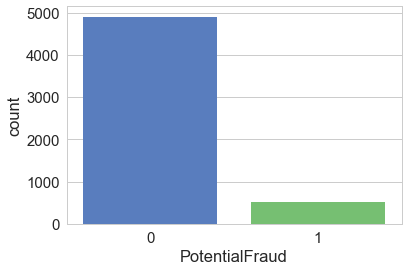

In [158]:
sns.countplot(Train_df.PotentialFraud)

In [159]:
Train_corr=Train_df.corr()

In [160]:
Train_corr['PotentialFraud']

BeneID_count                       0.393531
ClaimID_count                      0.374197
InscClaimAmtReimbursed             0.575558
DeductibleAmtPaid                  0.532070
RenalDiseaseIndicator              0.391002
AttendingPhysician                 0.374253
OperatingPhysician                 0.445086
OtherPhysician                     0.342673
AdmitForDays                       0.526338
ChronicCond_Alzheimer              0.380344
ChronicCond_Heartfailure           0.384131
ChronicCond_Cancer                 0.376945
ChronicCond_KidneyDisease          0.394239
ChronicCond_ObstrPulmonary         0.396191
ChronicCond_Depression             0.377411
ChronicCond_Diabetes               0.378881
ChronicCond_IschemicHeart          0.380093
ChronicCond_Osteoporasis           0.378274
ChronicCond_rheumatoidarthritis    0.380161
ChronicCond_stroke                 0.399206
IPAnnualReimbursementAmt           0.461978
IPAnnualDeductibleAmt              0.454921
OPAnnualReimbursementAmt        

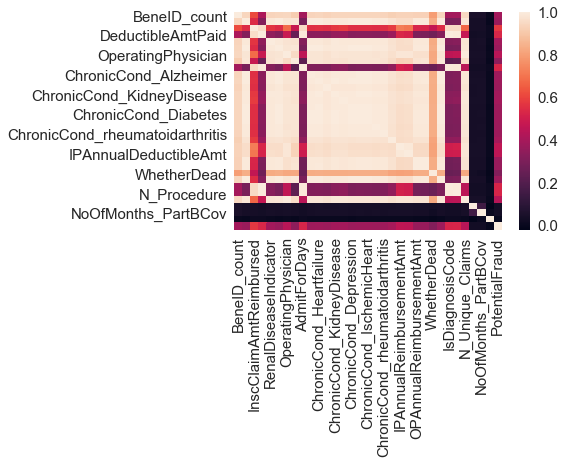

In [161]:
sns.heatmap(Train_corr)

## Bivariate Analysis 

Text(0,0.5,'BeneID_count')

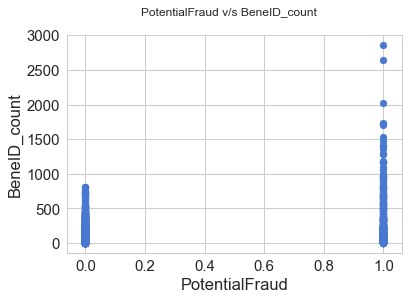

In [162]:
plt.scatter(Train_df['PotentialFraud'], Train_df['BeneID_count'])
plt.suptitle('PotentialFraud v/s BeneID_count')
plt.xlabel('PotentialFraud')
plt.ylabel('BeneID_count')

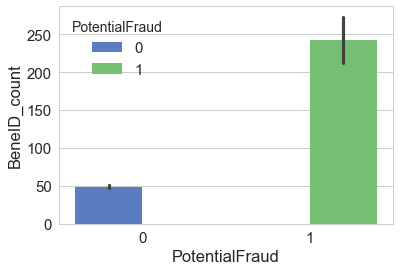

In [163]:
sns.barplot(Train_df["PotentialFraud"],Train_df["BeneID_count"], hue=Train_df["PotentialFraud"])

As we can see Fraudulant claims have higher number of Beneficiary ID as they tend to commit fraud with multiple beneficiary id.

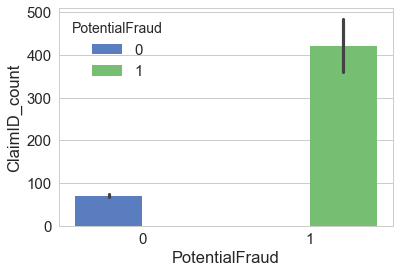

In [164]:
sns.barplot(Train_df["PotentialFraud"],Train_df["ClaimID_count"], hue=Train_df["PotentialFraud"])

Same as the above observation, potential fraud claims tend to have higher number of Claim ID.

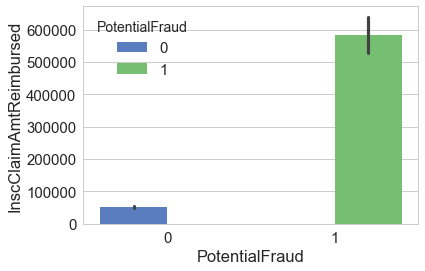

In [165]:
sns.barplot(Train_df["PotentialFraud"],Train_df["InscClaimAmtReimbursed"], hue=Train_df["PotentialFraud"])

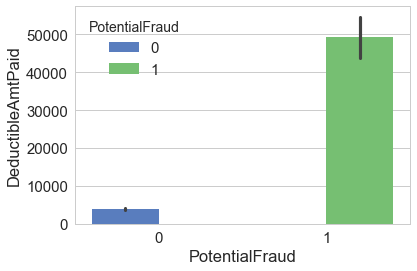

In [166]:
sns.barplot(Train_df["PotentialFraud"],Train_df["DeductibleAmtPaid"], hue=Train_df["PotentialFraud"])

As we have observed both in InscClaimAmtReimbursed and DeductibleAmtPaid are way higher than the legitimate claims.

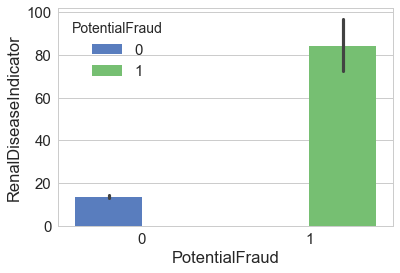

In [167]:
sns.barplot(Train_df["PotentialFraud"],Train_df["RenalDiseaseIndicator"], hue=Train_df["PotentialFraud"])

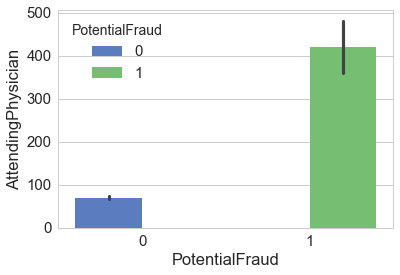

In [169]:
sns.barplot(Train_df["PotentialFraud"],Train_df["AttendingPhysician"], hue=Train_df["PotentialFraud"])

PotentialFraud
0     70.242863
1    419.430830
Name: AttendingPhysician, dtype: float64


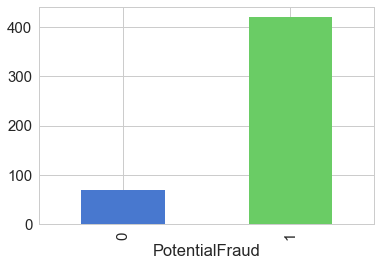

In [170]:
print(Train_df.groupby('PotentialFraud')['AttendingPhysician'].mean())

Train_df.groupby('PotentialFraud')['AttendingPhysician'].mean().plot.bar()

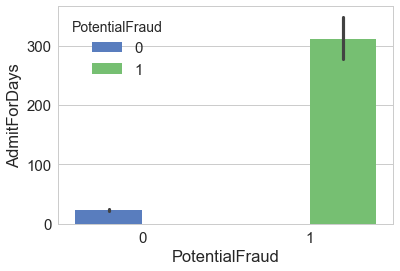

In [171]:
sns.barplot(Train_df["PotentialFraud"],Train_df["AdmitForDays"], hue=Train_df["PotentialFraud"])

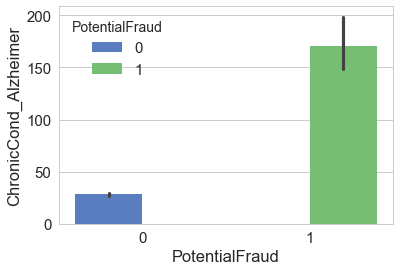

In [172]:
sns.barplot(Train_df["PotentialFraud"],Train_df["ChronicCond_Alzheimer"], hue=Train_df["PotentialFraud"])

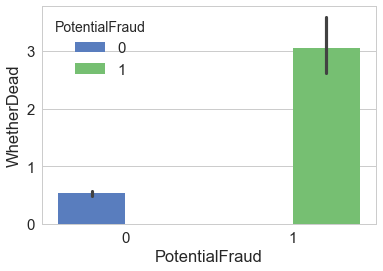

In [174]:
sns.barplot(Train_df["PotentialFraud"],Train_df["WhetherDead"], hue=Train_df["PotentialFraud"])

In category 0, the bar is between 0 and 1 because there are some people who are dead and some are alive, but in category 1 the bar has gone above 3 that means fraudulant claims are more likely to happen where people are dead.

In [175]:
df_reg=Train_df[['InscClaimAmtReimbursed','DeductibleAmtPaid','AdmitForDays','IsDiagnosisCode','N_Procedure','PotentialFraud']]

In [ ]:
df_reg

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [177]:
x=df_reg.iloc[:,1:-1].values
y=df_reg.iloc[:,-1].values

In [ ]:
y

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [179]:
lg=LogisticRegression()
model_df=lg.fit(x_train,y_train)

In [180]:
print(model_df)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [181]:
y_pred_reg=model_df.predict(x_test)

In [182]:
confusion_matrix(y_pred_reg,y_test)

array([[1467,   93],
       [  12,   51]], dtype=int64)

In [183]:
accuracy_score(y_pred_reg,y_test)

0.9353049907578558